In [162]:
import random
def init(Nx = 20 , Ny = 20):
  C = [[0 for j in range(Nx+2)] for i in range(Ny+2)]
  for i in range(1,Ny+1):
    for j in range(1,Nx+1):
        C[i][j] = random.randint(0,1)
  return C
C


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [163]:
import matplotlib.pyplot as plt
def plot(C):
    plt.imshow(C, cmap= 'gray')
    plt.axis('off')
    plt.show()
    

In [175]:
def iter(C):
    Ny, Nx = len(C) - 2, len(C[0]) - 2
    C2 = [[0 for j in range(Nx + 2)] for i in range(Ny + 2)]
    for i in range(1, Ny + 1):
        for j in range(1, Nx + 1):
            cell = C[i][j]
            v = (
                C[i][j + 1]
                + C[i][j - 1]
                + C[i - 1][j]
                + C[i + 1][j]
                + C[i + 1][j + 1]
                + C[i + 1][j - 1]
                + C[i - 1][j + 1]
                + C[i - 1][j - 1]
            )
            if cell == 0:
                if v == 3:
                    C2[i][j] = 1
                else:
                    C2[i][j] = 0
            else:
                if v == 2 or v == 3:
                    C2[i][j] = 1
                else:
                    C2[i][j] = 0
    for i in range(1, Ny + 1):
        for j in range(1, Nx + 1):
            C[i][j] = C2[i][j]
    return C2


def game(C0, MAX_IT=10):
    count = 0
    Cs = [C0]
    while count < MAX_IT:  # Corregido iter por count
        C = iter(C0)
        Cs.append(C)
        C0=C
        count += 1

    return Cs


    

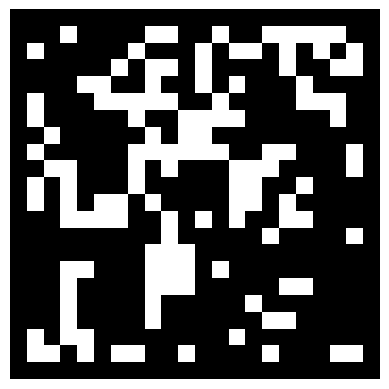

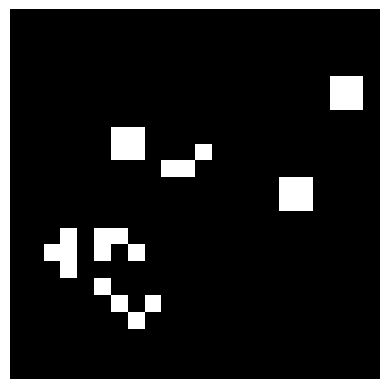

In [176]:
C = init()
Cs = game(C)
plot(Cs[0])
plot(Cs[-1])

In [177]:
from matplotlib import animation, rc
rc('animation', html = 'html5')

def update(i):
    ax.clear()
    ax.imshow(Cs[i], cmap='heat')
    ax.axis('off')
    return ax

c = init()
Cs=game(C)
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig,update,frames=len(Cs),interval=100)
plt.close()

anim

RuntimeError: Requested MovieWriter (ffmpeg) not available